In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ETL

In [2]:
# get data from "API"
data = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
data_raw = pd.read_json(data)

data = data_raw.iloc[:, 0:2]

# Unpack json dictionary
for column in ['customer', 'phone', 'internet', 'account']:
    data = pd.concat([data, pd.json_normalize(data_raw[column])], axis=1)

del data_raw

# Columns with binary values (0 / 1) (Yes / No)
binary_data = ['Churn','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Transform binary values to 0 / 1 / NaN , Nan --> 0 
to_binary = lambda x: 1 if x in ['Yes', 'yes', '1'] else 0 if x in ['No', 'no', '0'] else 0
data[binary_data] = data[binary_data].map(to_binary)

# Convert charges total to float
data['Charges.Total'] = data['Charges.Total'].apply(str.replace, args=(' ', '')).apply(str.replace, args=('', '0'))
data['Charges.Total'] = data['Charges.Total'].astype(float)

# New column with daily charges (average 30 days/month)
data['Charges.daily'] = data['Charges.Monthly']  / 30
data['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check': 'E-Check', 'Mailed check': 'Check', 'Bank transfer (automatic)': 'Bank transfer', 'Credit card (automatic)': 'Credit card'})

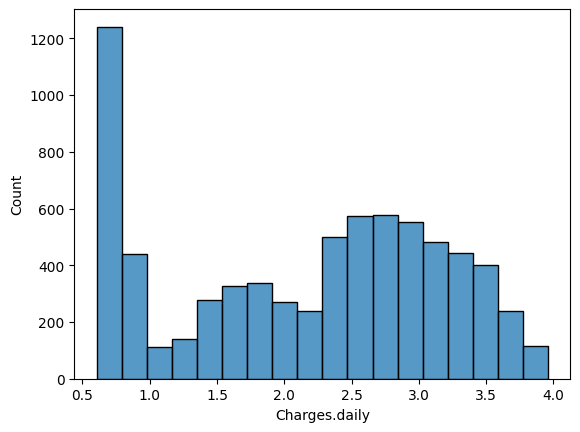

std: 1.004
mean: 2.157
median: 2.343


In [3]:
sns.histplot(data=data, x='Charges.daily')
plt.show()
print(f'std: {data['Charges.daily'].std():.3f}')
print(f'mean: {data['Charges.daily'].mean():.3f}')
print(f'median: {data['Charges.daily'].median():.3f}')

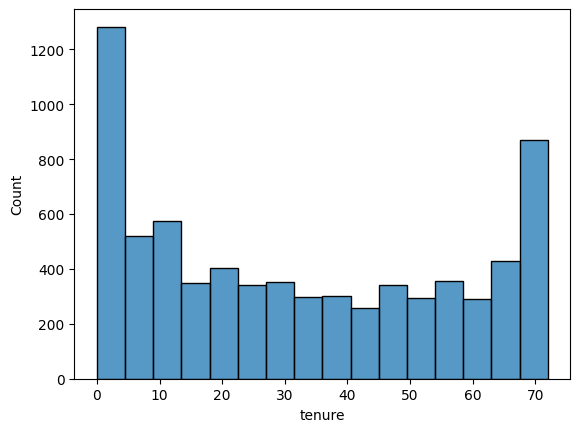

std: 24.572
mean: 32.346
median: 29.000


In [4]:
sns.histplot(data=data, x='tenure')
plt.show()
print(f'std: {data['tenure'].std():.3f}')
print(f'mean: {data['tenure'].mean():.3f}')
print(f'median: {data['tenure'].median():.3f}')

Axes(0.1,0.523913;0.714286x0.326087)
Axes(0.885714,0.523913;0.714286x0.326087)
Axes(0.1,0.1;0.714286x0.326087)
Axes(0.885714,0.1;0.714286x0.326087)


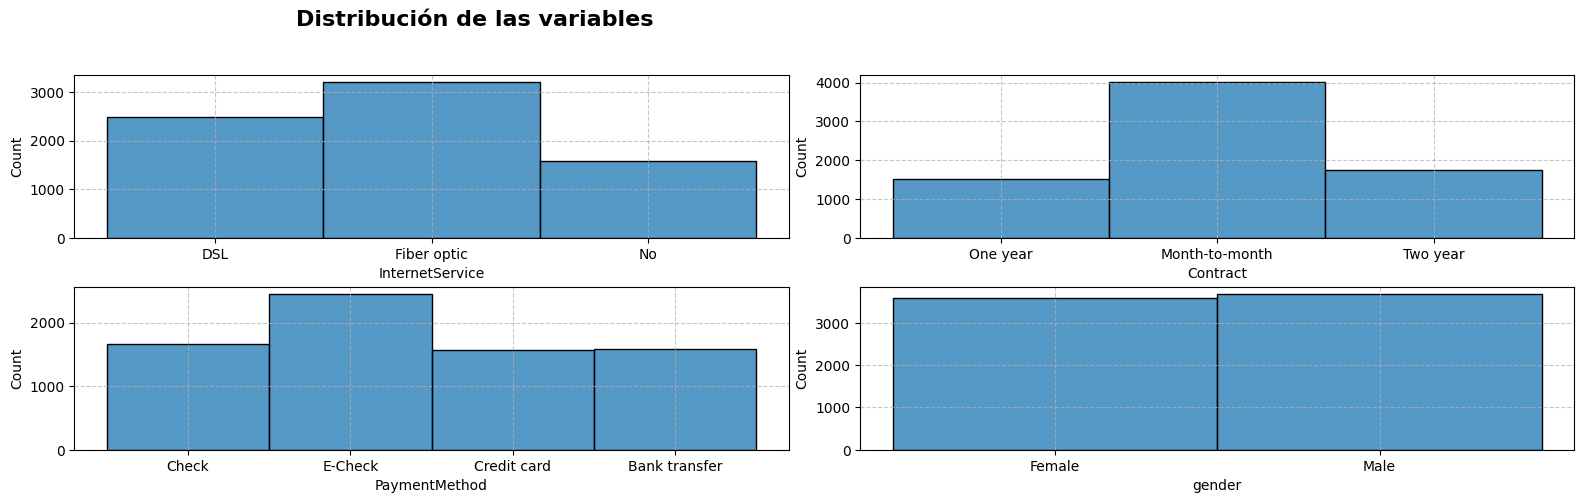

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5, wspace=0.1)
plt.suptitle('Distribución de las variables', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.85, hspace=0.3, left=0.1, right=1.6, bottom=0.1)

sns.histplot(data=data, x='InternetService', ax=ax[0, 0])
sns.histplot(data=data, x='Contract', ax=ax[0, 1])
sns.histplot(data=data, x='PaymentMethod', ax=ax[1, 0])
sns.histplot(data=data, x='gender', ax=ax[1, 1])

# Add grid lines to all subplots
for axis in ax.flat:
    axis.grid(True, linestyle='--', alpha=0.7)
    print(axis)


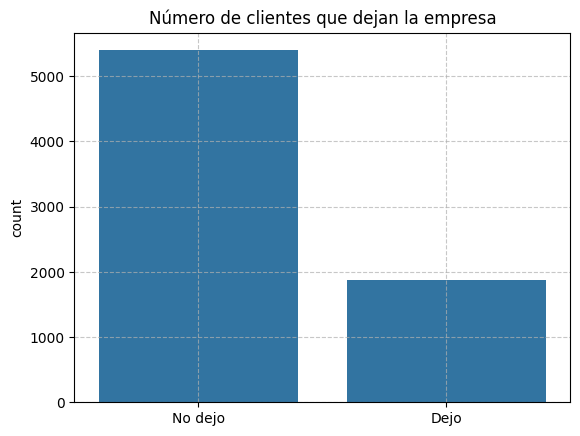

In [6]:
sns.countplot(data=data, x='Churn')
plt.xticks([0, 1], ['No dejo', 'Dejo'])
plt.title('Número de clientes que dejan la empresa')
plt.xlabel('')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Análisis de evasión 

In [8]:
customer_lost = data[data['Churn'] == 1]
customer_retained = data[data['Churn'] == 0]

In [9]:
data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.daily'],
      dtype='object')

<Axes: xlabel='Charges.Monthly', ylabel='Count'>

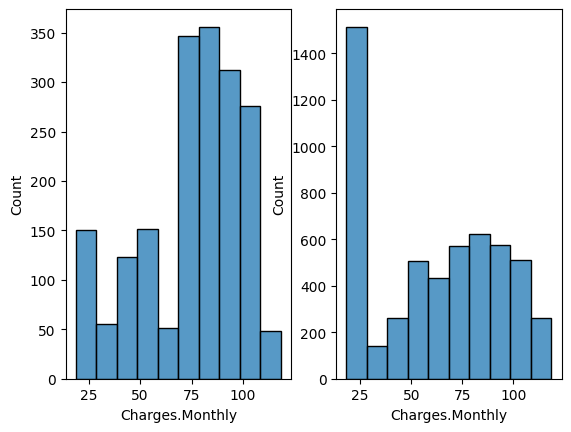

In [17]:
plt.subplot(1, 2, 1)
total = data.shape[0]
column = 'Charges.Monthly'

plt.subplot(1, 2, 1)
sns.histplot(data=customer_lost[column], bins=10)

plt.subplot(1, 2, 2)
sns.histplot(data=customer_retained[column],  bins=10)

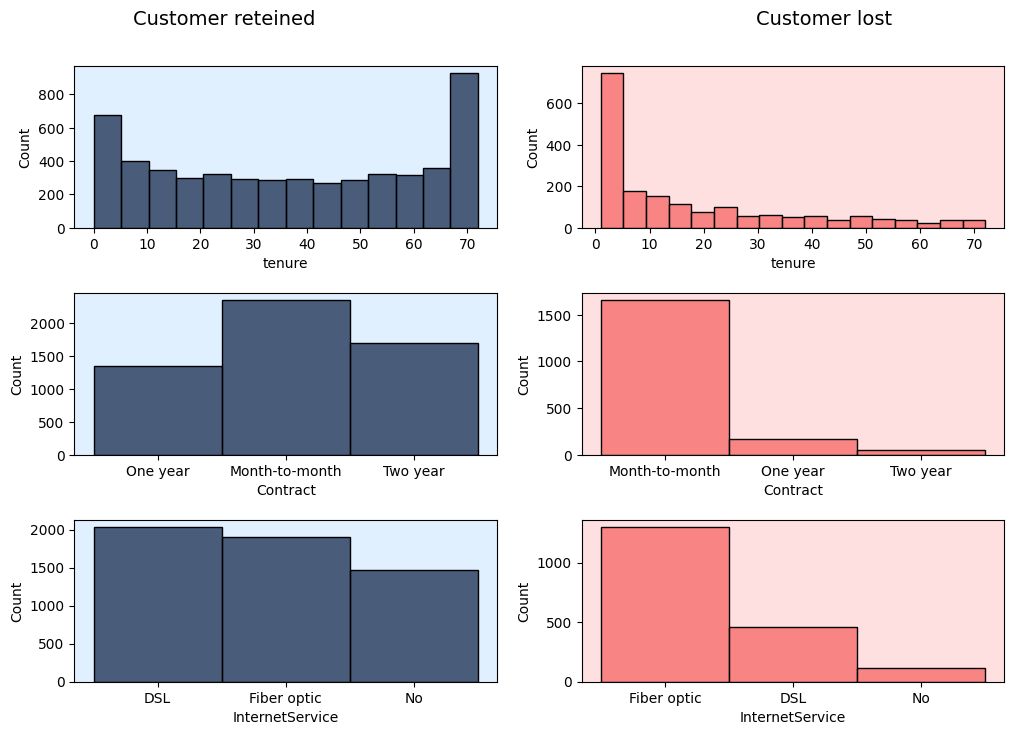

In [28]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[1, 1, 1]) # Crear GridSpec de 3 filas x 2 columnas
gs.update(hspace=0.4)


fig.text(0.25, 0.95, 'Customer reteined', ha='center', va='top', fontsize=14)
fig.text(0.75, 0.95, 'Customer lost', ha='center', va='top', fontsize=14)

columns = ['tenure', 'Contract', 'InternetService']

for row in range(3):
    # Columna 1 - color de fondo azul claro
    ax1 = fig.add_subplot(gs[row, 0])
    ax1.set_facecolor('#e0f0ff')  # azul claro
    sns.histplot(data=customer_retained[columns[row]], ax=ax1, color='#162b4e')

    # Columna 2 - color de fondo rosado claro
    ax2 = fig.add_subplot(gs[row, 1])
    ax2.set_facecolor('#ffe0e0')  # rosado claro
    sns.histplot(data=customer_lost[columns[row]], ax=ax2, color='#f76565')

plt.show()

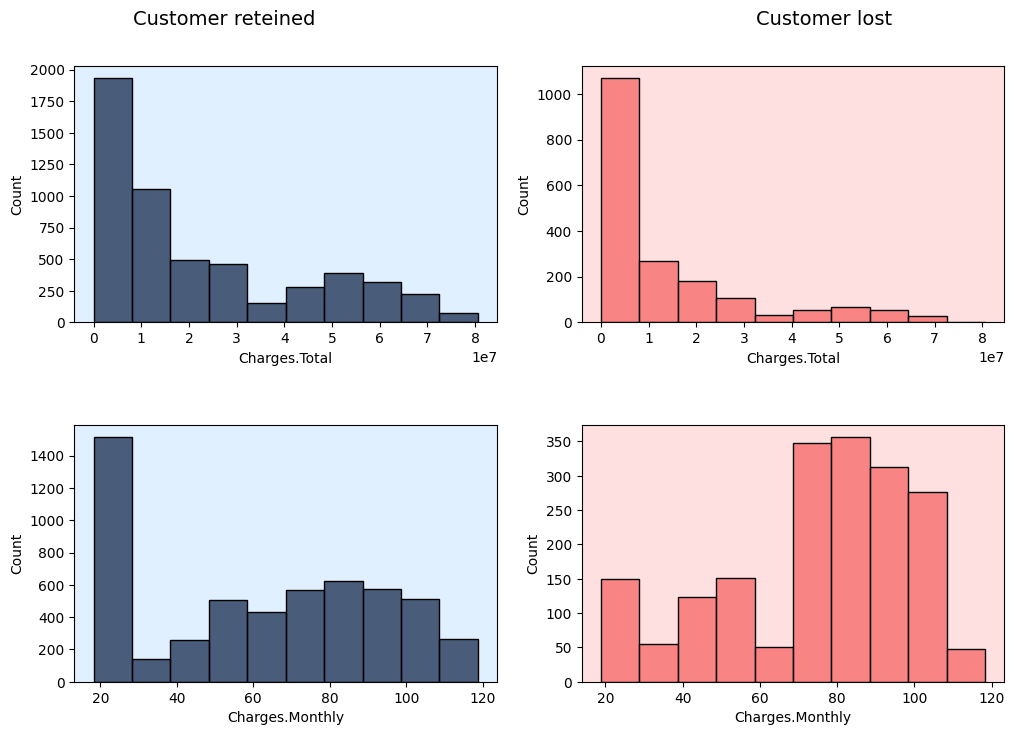

In [34]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[1, 1]) 
gs.update(hspace=0.4)


fig.text(0.25, 0.95, 'Customer reteined', ha='center', va='top', fontsize=14)
fig.text(0.75, 0.95, 'Customer lost', ha='center', va='top', fontsize=14)

columns = ['Charges.Total', 'Charges.Monthly']

for row in range(2):
    # Columna 1 - color de fondo azul claro
    ax1 = fig.add_subplot(gs[row, 0])
    ax1.set_facecolor('#e0f0ff')  # azul claro
    sns.histplot(data=customer_retained[columns[row]], ax=ax1, color='#162b4e', bins=10)

    # Columna 2 - color de fondo rosado claro
    ax2 = fig.add_subplot(gs[row, 1])
    ax2.set_facecolor('#ffe0e0')  # rosado claro
    sns.histplot(data=customer_lost[columns[row]], ax=ax2, color='#f76565', bins=10)

plt.show()

# 📊 Informe de Evasión de Clientes (Churn)

## 1. Introducción

El presente análisis tiene como objetivo identificar patrones y factores relacionados con la **evasión de clientes** en una empresa de telecomunicaciones. Este fenómeno, conocido como *churn*, representa una pérdida significativa para el negocio, por lo que comprender sus causas es clave para implementar estrategias de retención efectivas.

---

## 2. Limpieza y Tratamiento de Datos

- Se integraron varias secciones del JSON (`customer`, `phone`, `internet`, `account`) en un único DataFrame.
- Se convirtieron columnas categóricas binarias (`Yes`/`No`) a formato numérico (1/0).
- Se eliminaron inconsistencias y se convirtieron los campos numéricos (como `Charges.Total`) a tipo `float`.
- Se creó una nueva columna `Charges.daily` como estimación del costo diario del servicio.

---

## 3. Análisis Exploratorio de Datos (EDA)

Se compararon clientes retenidos (`Churn = 0`) y perdidos (`Churn = 1`) mediante visualizaciones.

### Distribución de Cargos

- Los clientes perdidos tienden a tener menores cargos totales acumulados.
- En cargos mensuales, los clientes perdidos están más concentrados en valores intermedios-altos.



---

### Tenencia, Contrato y Tipo de Internet

- Los clientes que abandonan el servicio suelen tener **poca antigüedad** (tenure bajo).
- La **modalidad "Month-to-month"** está fuertemente asociada al churn.
- **Internet por fibra óptica** es más común entre los clientes que se dan de baja.



---

## 4. Conclusiones e Insights

- La mayoría de los clientes que se van tienen:
  - Menos de 12 meses en la empresa.
  - Contrato mes a mes.
  - Servicio de internet por fibra.
- Hay un **grupo vulnerable al churn** claramente identificable por estos patrones.
- **El churn parece relacionado con la falta de fidelización temprana.**

---

## 5. Recomendaciones

- Implementar **bonificaciones de permanencia** para nuevos clientes (primeros 12 meses).
- Ofrecer **descuentos o planes anuales** que compitan con la modalidad "Month-to-month".
- Analizar la calidad del servicio de **internet por fibra óptica**, dado su vínculo con el churn.
- Utilizar estos perfiles para **detectar clientes en riesgo** y anticiparse al abandono.
